In [486]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets, mixture 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn import svm

In [487]:
def Par():

    c1=2
    c2=4
    n=100
    x=np.linspace(0,3,n)
    shum=np.random.normal(0,0.5,n)
    y1=-((2*x-c1)**2)+4+shum
    y2=((2*x-c2)**2)-4+shum

    mask1 = (y1 >= -2)  
    mask2 = (y2 <= 2) 

    x_class1=np.column_stack((x[mask1],y1[mask1]))
    x_class2=np.column_stack((x[mask2],y2[mask2]))

    y_class1=np.zeros(x_class1.shape[0])
    y_class2=np.ones(x_class2.shape[0])

    X = np.vstack((x_class1, x_class2))
    y = np.concatenate((y_class1, y_class2))
    return np.array(X),np.array(y)
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
x, y = noisy_circles
x1,y1=Par()

In [488]:
x = np.array(x)
y = np.array(y)

temp_x = np.linspace(x[:, 0].min() - 1, x[:, 0].max() + 1, 100)
temp_y = np.linspace(x[:, 1].min() - 1, x[:, 1].max() + 1, 100)

xx, yy = np.meshgrid(temp_x, temp_y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

x1 = np.array(x1)
y1 = np.array(y1)

temp_x1 = np.linspace(x1[:, 0].min() - 1, x1[:, 0].max() + 1, 100)
temp_y1 = np.linspace(x1[:, 1].min() - 1, x1[:, 1].max() + 1, 100)

xx1, yy1 = np.meshgrid(temp_x1, temp_y1)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.1, random_state=42)

x_train1 = np.asarray(x_train1)
x_test1 = np.asarray(x_test1)
y_train1 = np.asarray(y_train1)
y_test1 = np.asarray(y_test1)


print(x1.shape[0],y1.shape[0])

148 148


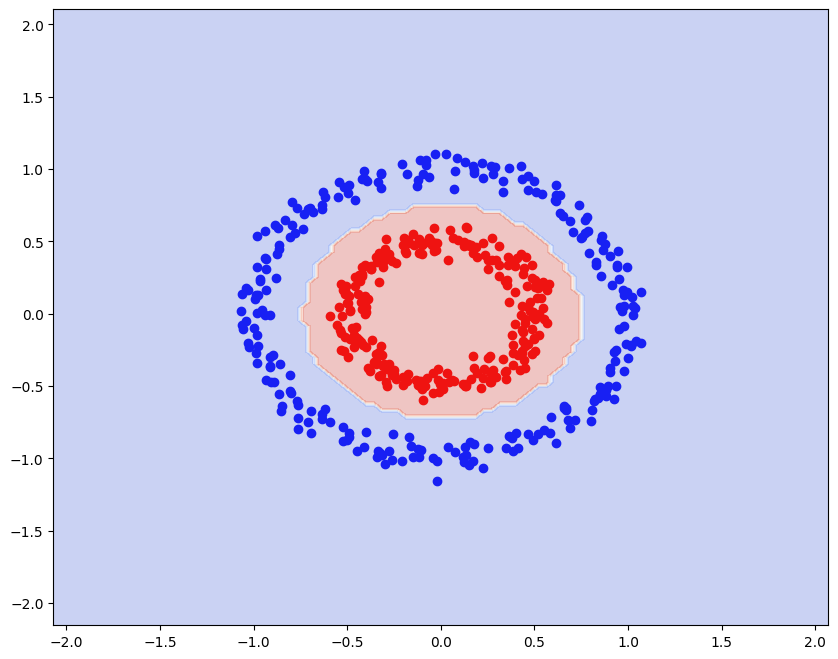

In [489]:


colors = ['g', 'b']

svm=sk.svm.SVC(kernel='rbf')
svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)


plt.figure(figsize=(10, 8))


plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')

xx, yy = np.meshgrid(np.linspace(x[:, 0].min()-1, x[:, 0].max()+1, 100),
                     np.linspace(x[:, 1].min()-1, x[:, 1].max()+1, 100))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.show()



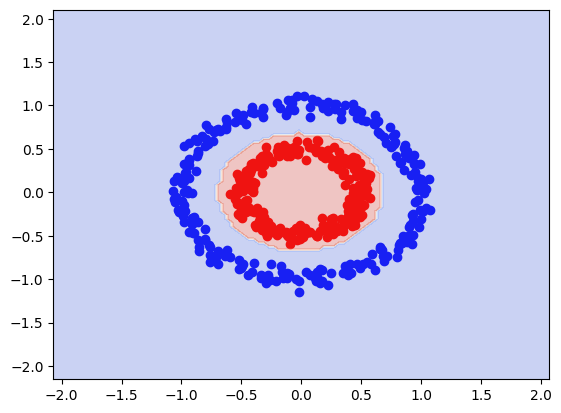

In [490]:

bayas=sk.naive_bayes.GaussianNB()
bayas.fit(x_train,y_train)

y_pred=bayas.predict(x_test)


xx, yy = np.meshgrid(np.linspace(x[:, 0].min()-1, x[:, 0].max()+1, 100),
                     np.linspace(x[:, 1].min()-1, x[:, 1].max()+1, 100))
Z1=bayas.predict(np.c_[xx.ravel(),yy.ravel()])
Z1=Z1.reshape(xx.shape)
plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')
plt.contourf(xx, yy, Z1, alpha=0.3, cmap=plt.cm.coolwarm)
plt.show()

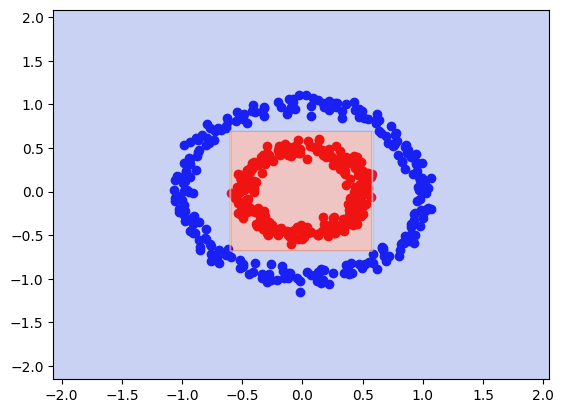

In [491]:
pers=DecisionTreeClassifier()
pers.fit(x_train,y_train)

y_pred=pers.predict(x_test)
h = 0.02  
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = pers.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.show()

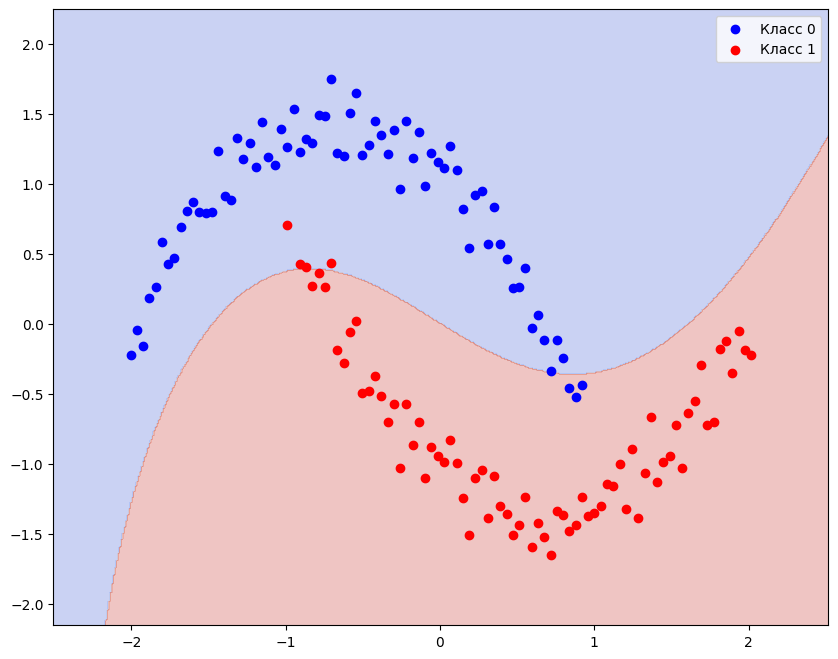

In [492]:

x1, y1 = Par()

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.1, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x1_scaled = scaler.transform(x1)


svm1 = SVC(kernel='rbf', C=10, gamma=0.1)
svm1.fit(x_train1_scaled, y_train1)

# prediction mesh on x1_scaled
xx1, yy1 = np.meshgrid(
    np.linspace(x1_scaled[:, 0].min() - 0.5, x1_scaled[:, 0].max() + 0.5, 500),
    np.linspace(x1_scaled[:, 1].min() - 0.5, x1_scaled[:, 1].max() + 0.5, 500)
)
Z1 = svm1.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, Z1, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x1_scaled[y1 == 0, 0], x1_scaled[y1 == 0, 1], c='blue', label='Класс 0')
plt.scatter(x1_scaled[y1 == 1, 0], x1_scaled[y1 == 1, 1], c='red', label='Класс 1')
plt.legend()
plt.show()

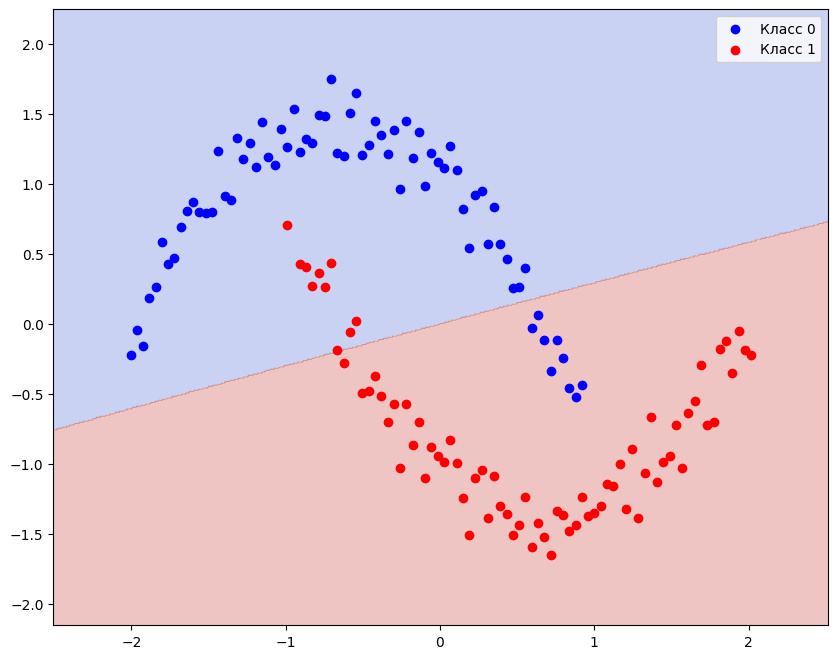

In [493]:




BPred = sk.naive_bayes.GaussianNB()
BPred.fit(x_train1_scaled, y_train1)


xx1, yy1 = np.meshgrid(
    np.linspace(x1_scaled[:, 0].min() - 0.5, x1_scaled[:, 0].max() + 0.5, 500),
    np.linspace(x1_scaled[:, 1].min() - 0.5, x1_scaled[:, 1].max() + 0.5, 500)
)
Z1 = BPred.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, Z1, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x1_scaled[y1 == 0, 0], x1_scaled[y1 == 0, 1], c='blue', label='Класс 0')
plt.scatter(x1_scaled[y1 == 1, 0], x1_scaled[y1 == 1, 1], c='red', label='Класс 1')
plt.legend()
plt.show()

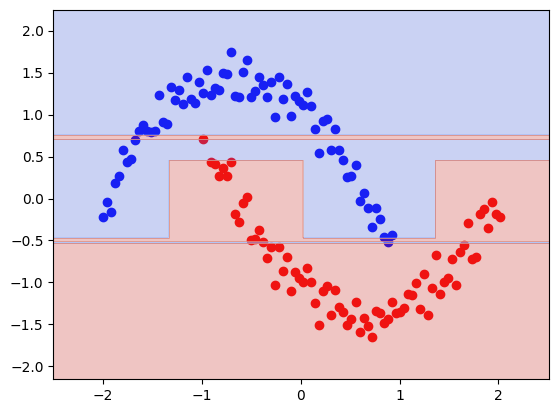

In [494]:
Pr=DecisionTreeClassifier()
Pr.fit(x_train1_scaled, y_train1)


xx1, yy1 = np.meshgrid(
    np.linspace(x1_scaled[:, 0].min() - 0.5, x1_scaled[:, 0].max() + 0.5, 500),
    np.linspace(x1_scaled[:, 1].min() - 0.5, x1_scaled[:, 1].max() + 0.5, 500)
)


Z = Pr.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z = Z.reshape(xx1.shape)

plt.scatter(x1_scaled[y1 == 0, 0], x1_scaled[y1 == 0, 1], c='blue', label='Класс 0')
plt.scatter(x1_scaled[y1 == 1, 0], x1_scaled[y1 == 1, 1], c='red', label='Класс 1')
plt.contourf(xx1, yy1, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.show()

In [495]:

def tucha():

    n1 = 50
    shum1 = np.random.normal(0, 1, n1)
    x1 = np.linspace(0, 2, n1)
    y1 = x1 + shum1
    class1 = np.zeros(n1) 

  
    n2 = 80
    x2 = np.linspace(0, 4.5, n2)
    shum2 = np.random.normal(0, 3, n2)
    y2 = x2 + shum2
    class2 = np.ones(n2)  


    X = np.vstack((
        np.column_stack((x1, y1)),
        np.column_stack((x2, y2))
    ))
    y = np.hstack((class1, class2))

    return X, y

xsh, ysh = tucha()
x_train, x_test, y_train, y_test = train_test_split(xsh, ysh, test_size=0.2)

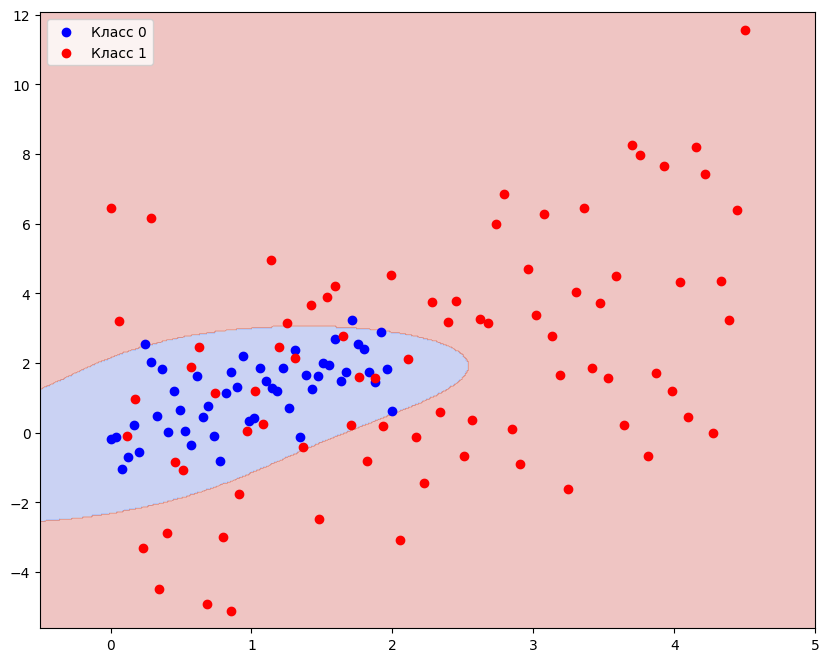

In [496]:


svmSh = SVC(kernel='rbf', C=10, gamma=0.1)
svmSh.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(xsh[:, 0].min() - 0.5, xsh[:, 0].max() + 0.5, 500),
    np.linspace(xsh[:, 1].min() - 0.5, xsh[:, 1].max() + 0.5, 500)
)
ZSH = svmSh.predict(np.c_[xx1.ravel(), yy1.ravel()])
ZSH = ZSH.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, ZSH, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(xsh[ysh == 0, 0], xsh[ysh == 0, 1], c='blue', label='Класс 0')  
plt.scatter(xsh[ysh == 1, 0], xsh[ysh == 1, 1], c='red', label='Класс 1')   

plt.legend()
plt.show()


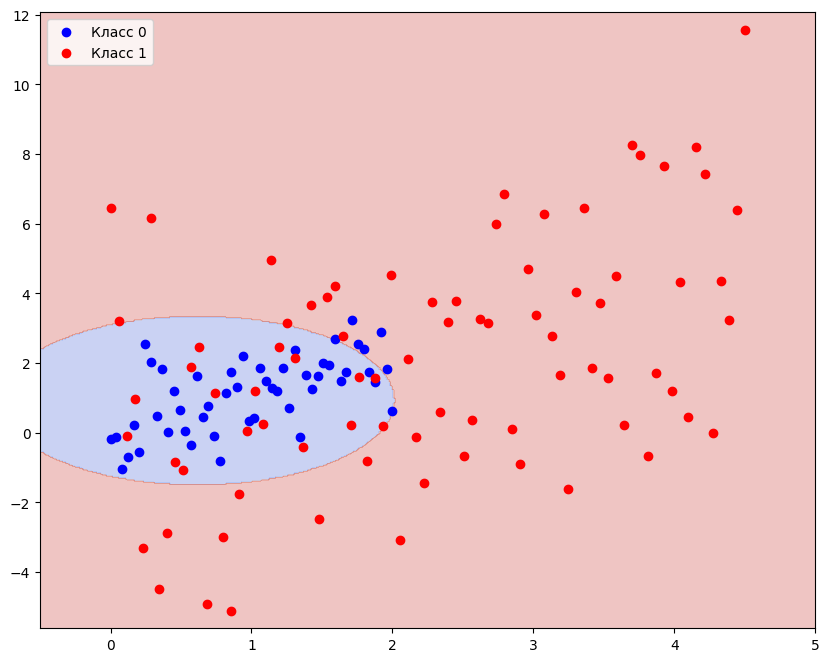

In [497]:

BSH = sk.naive_bayes.GaussianNB()
BSH.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(xsh[:, 0].min() - 0.5, xsh[:, 0].max() + 0.5, 500),
    np.linspace(xsh[:, 1].min() - 0.5, xsh[:, 1].max() + 0.5, 500)
)
Z1 = BSH.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, Z1, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(xsh[ysh == 0, 0], xsh[ysh == 0, 1], c='blue', label='Класс 0')
plt.scatter(xsh[ysh == 1, 0], xsh[ysh == 1, 1], c='red', label='Класс 1')
plt.legend()
plt.show()

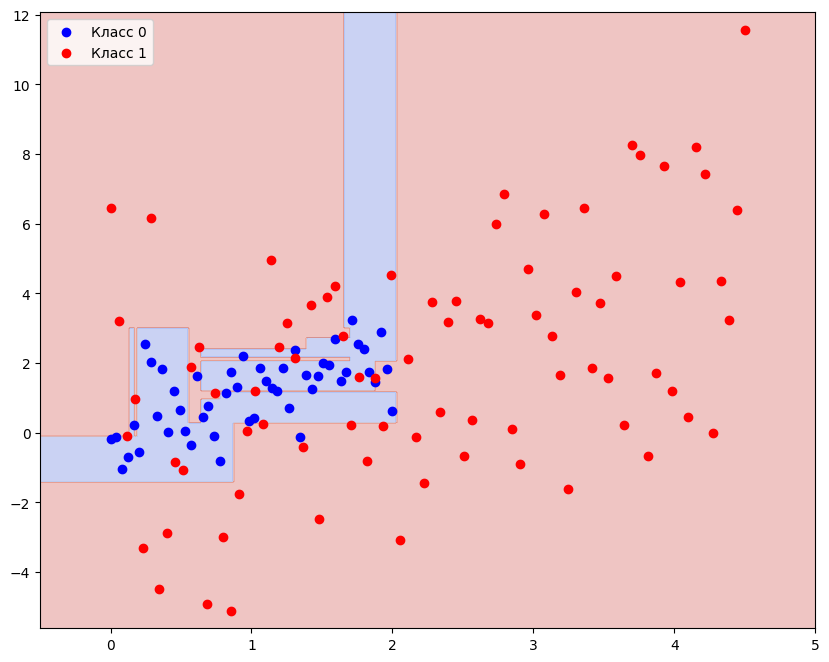

In [498]:
PRSH=DecisionTreeClassifier()
PRSH.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(xsh[:, 0].min() - 0.5, xsh[:, 0].max() + 0.5, 500),
    np.linspace(xsh[:, 1].min() - 0.5, xsh[:, 1].max() + 0.5, 500)
)
Z1 = PRSH.predict(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, Z1, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(xsh[ysh == 0, 0], xsh[ysh == 0, 1], c='blue', label='Класс 0')
plt.scatter(xsh[ysh == 1, 0], xsh[ysh == 1, 1], c='red', label='Класс 1')
plt.legend()
plt.show()

In [499]:

def linii():
    n = 200
    x = np.linspace(0, 6, n)
    shum = np.random.normal(0, 0.2, n)
    y1 = -x + 3 + shum
    y2 = -x + 1 + shum
    

    X = np.concatenate([x, x]).reshape(-1, 1)  
    y = np.concatenate([np.zeros(n), np.ones(n)]) 

    noise_mask = (x >= 2.5) & (x <= 3.5)
    X_noise = np.concatenate([x[noise_mask], x[noise_mask]]).reshape(-1, 1)
    y_noise = np.concatenate([np.ones(noise_mask.sum()), np.zeros(noise_mask.sum())])
    
   
    X_2d = np.column_stack([
    np.concatenate([x, x, x[noise_mask], x[noise_mask]]),
    np.concatenate([-x + 3 + shum, -x + 1 + shum, -x[noise_mask] + 3 + shum[noise_mask], -x[noise_mask] + 1 + shum[noise_mask]])
    ])
    y = np.concatenate([np.zeros(n), np.ones(n), np.ones(noise_mask.sum()), np.zeros(noise_mask.sum())])



    
    return X_2d, y
x,y=linii()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Форма X:", x.shape)

Форма X: (468, 2)


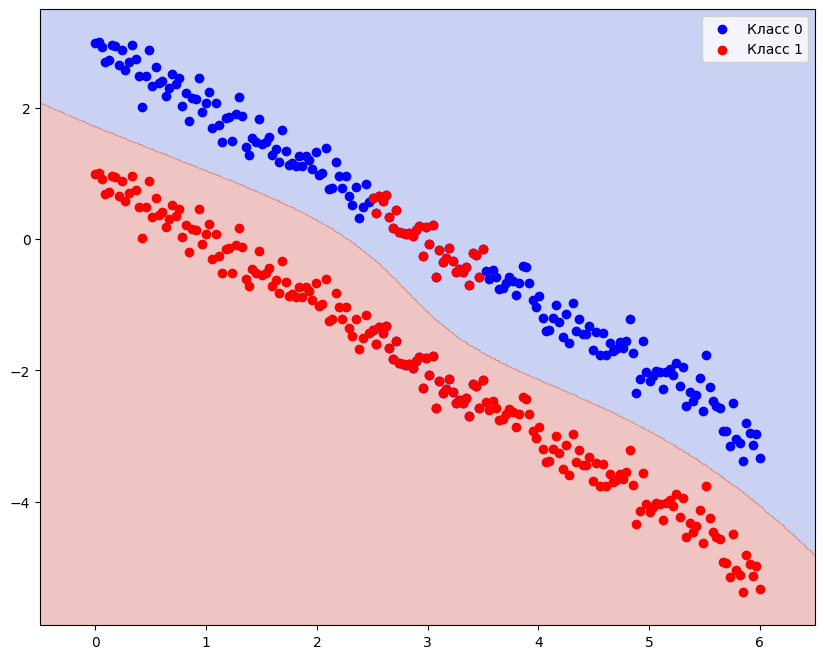

In [500]:



svmLn = SVC(kernel='rbf', C=10, gamma=0.1)
svmLn.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 500),
    np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 500))
ZLN = svmLn.predict(np.c_[xx1.ravel(), yy1.ravel()])
ZLN = ZLN.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, ZLN, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')  
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')   

plt.legend()
plt.show()

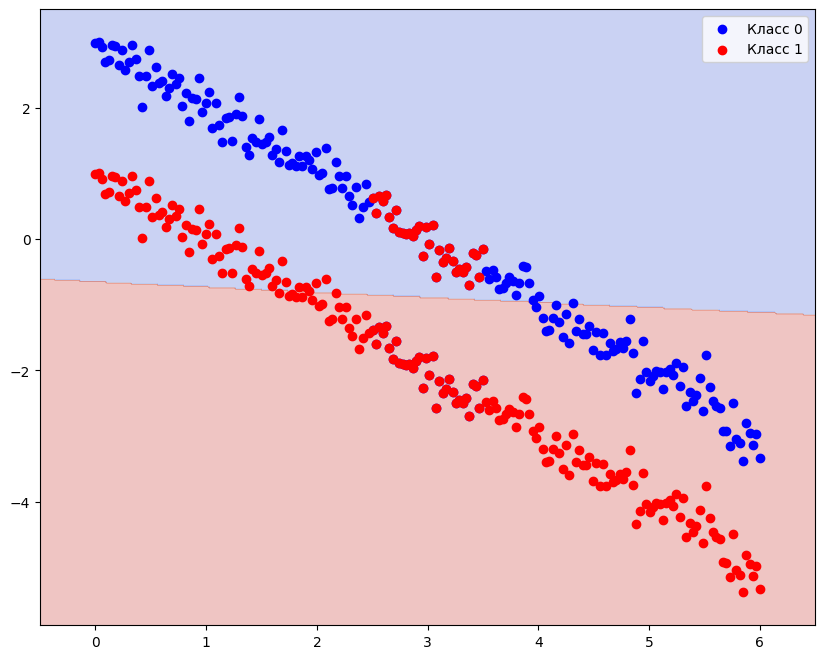

In [501]:

BSH = sk.naive_bayes.GaussianNB()
BSH.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 500),
    np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 500))
ZLN = BSH.predict(np.c_[xx1.ravel(), yy1.ravel()])
ZLN = ZLN.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, ZLN, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')  
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')   

plt.legend()
plt.show()

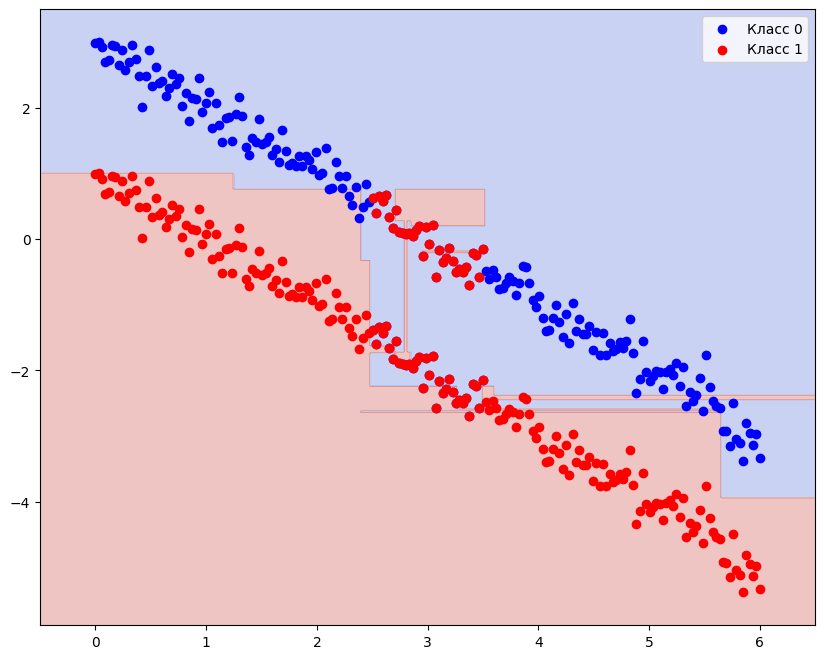

In [502]:
PRSH=DecisionTreeClassifier()
PRSH.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 500),
    np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 500))
ZLN = PRSH.predict(np.c_[xx1.ravel(), yy1.ravel()])
ZLN = ZLN.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, ZLN, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')  
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')   

plt.legend()
plt.show()

In [503]:
def DveOblastiSklearn():
    n1 = 120
    n2 = 79


    x1 = np.linspace(0, 3, n1)
    shum1 = np.random.normal(0, 1, n1)
    y1 = shum1
    class0 = np.column_stack((x1, y1))
    labels0 = np.zeros(n1)


    x2 = np.linspace(3, 5, n2)
    shum2 = np.random.normal(0, 2, n2)
    y2 = shum2
    class1 = np.column_stack((x2, y2))
    labels1 = np.ones(n2)


    X = np.vstack((class0, class1))
    y = np.concatenate((labels0, labels1))

    return X, y
x,y = DveOblastiSklearn()
x_train,x_test, y_train,y_test=train_test_split(x,y,train_size=0.2)
print(y.shape)

(199,)


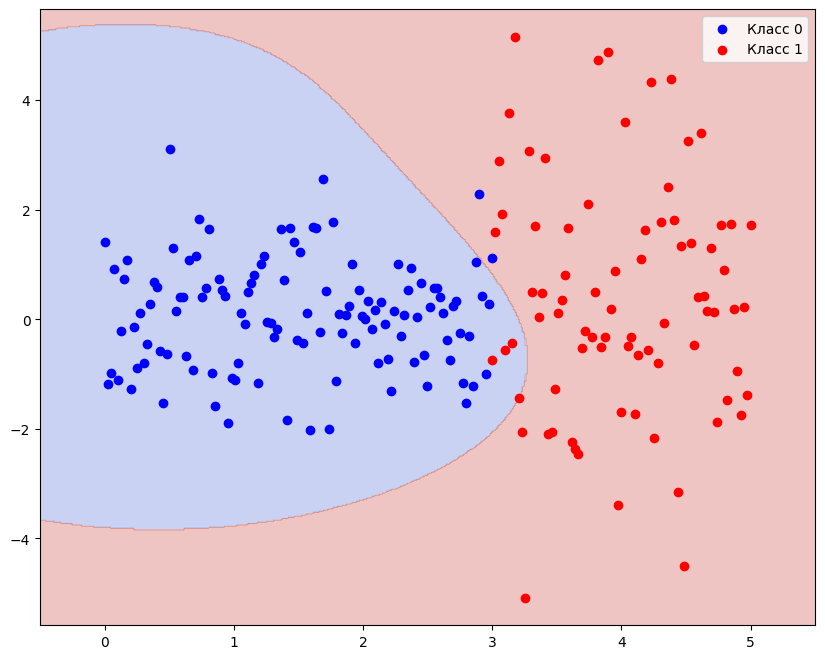

In [504]:

svmLn = SVC(kernel='rbf', C=10, gamma=0.1)
svmLn.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 500),
    np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 500))
ZLN = svmLn.predict(np.c_[xx1.ravel(), yy1.ravel()])
ZLN = ZLN.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, ZLN, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')  
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')   

plt.legend()
plt.show()

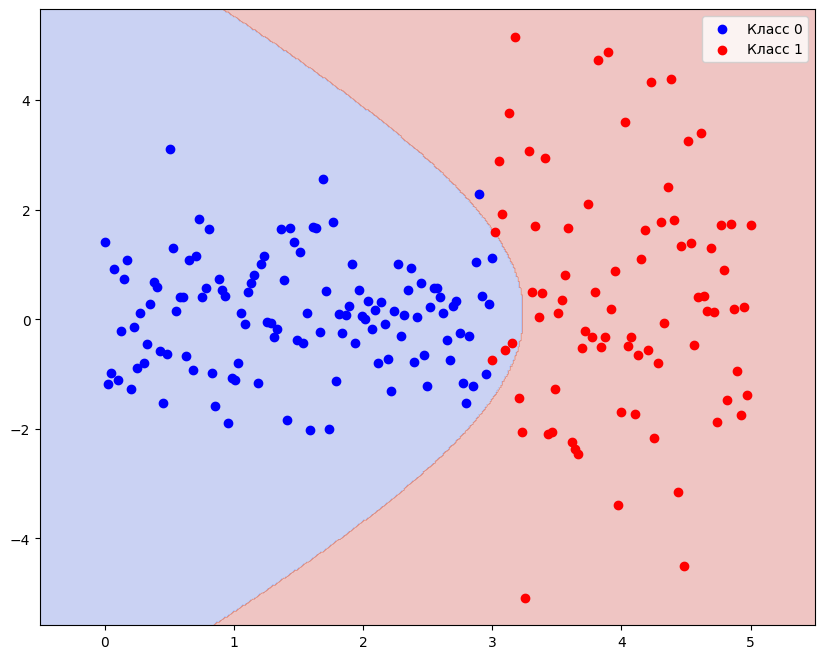

In [505]:
BSH = sk.naive_bayes.GaussianNB()
BSH.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 500),
    np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 500))
ZLN = BSH.predict(np.c_[xx1.ravel(), yy1.ravel()])
ZLN = ZLN.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, ZLN, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')  
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')   

plt.legend()
plt.show()

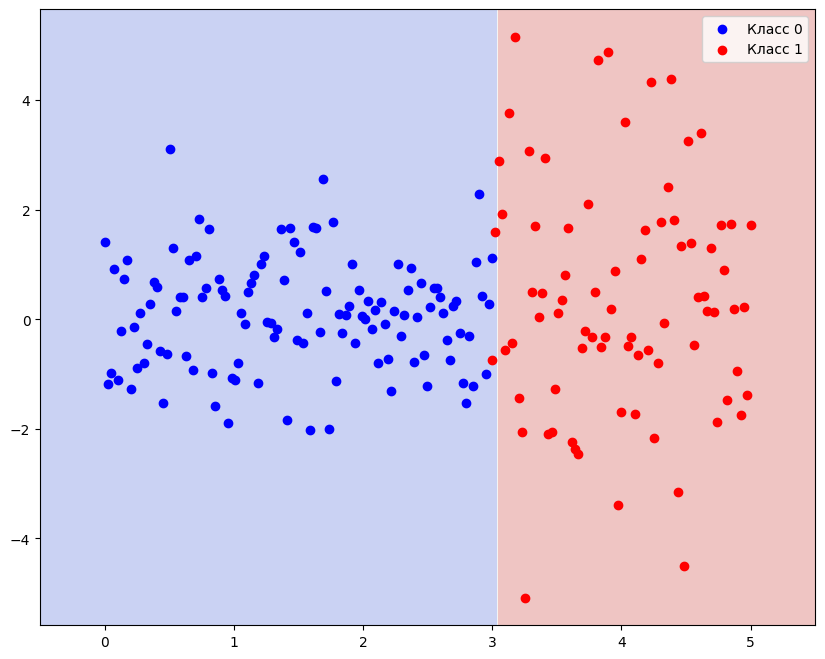

In [506]:
PRSH=DecisionTreeClassifier()
PRSH.fit(x_train, y_train)


xx1, yy1 = np.meshgrid(
    np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 500),
    np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 500))
ZLN = PRSH.predict(np.c_[xx1.ravel(), yy1.ravel()])
ZLN = ZLN.reshape(xx1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx1, yy1, ZLN, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', label='Класс 0')  
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', label='Класс 1')   

plt.legend()
plt.show()